- Opponent Statistics
- Player Statistics
- Game Win Margin

In [2]:
from moneylinefunctions import *

In [2]:
df = load_data(load_new_games=True)

# Filtering out regular season games
df["SEASON"] = df["SEASON_ID"].astype(str).str[1:].astype(int)
df["SEASON_TYPE"] = df["SEASON_ID"].astype(str).str[0:1]

df = df.loc[df["SEASON_TYPE"] == '2',:]
df.drop(columns=["SEASON_TYPE"], inplace=True)

df.head()

Loading Games...


  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:21<00:00,  1.42it/s]


Loaded Games!



,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,SEASON
0,22023,1610612737,ATL,Atlanta Hawks,22300835,2024-02-27,ATL vs. UTA,W,239,124,...,15,40,55.0,27,8,8,17,15,23.0,2023
1,22023,1610612737,ATL,Atlanta Hawks,22300821,2024-02-25,ATL vs. ORL,W,241,109,...,9,35,44.0,31,10,3,9,17,17.0,2023
2,22023,1610612737,ATL,Atlanta Hawks,22300804,2024-02-23,ATL vs. TOR,L,239,121,...,20,34,54.0,27,5,4,9,11,-2.0,2023
3,22023,1610612737,ATL,Atlanta Hawks,22300777,2024-02-14,ATL @ CHA,L,239,99,...,15,30,45.0,23,5,6,16,20,-23.0,2023
4,22023,1610612737,ATL,Atlanta Hawks,22300763,2024-02-12,ATL vs. CHI,L,241,126,...,15,34,49.0,33,4,3,11,20,-10.0,2023


In [3]:
def get_matchups(df, home=True):
    if home:
        opp = df[df["MATCHUP"].str.contains("@")].copy().drop(columns = ["MATCHUP", "TEAM_NAME", "MATCHUP", "SEASON", "GAME_DATE", "PLUS_MINUS", "WL", "SEASON_ID", "TEAM_ID", "TEAM_ABBREVIATION"])
        toi = df[df["MATCHUP"].str.contains("vs")].copy().drop(columns = ["MATCHUP", "TEAM_NAME", "MATCHUP"])
        toi["Home"] = 1
    else:
        opp = df[df["MATCHUP"].str.contains("vs")].copy().drop(columns = ["MATCHUP", "TEAM_NAME", "MATCHUP", "SEASON", "GAME_DATE", "PLUS_MINUS", "WL", "SEASON_ID", "TEAM_ID", "TEAM_ABBREVIATION"])
        toi = df[df["MATCHUP"].str.contains("@")].copy().drop(columns = ["MATCHUP", "TEAM_NAME", "MATCHUP"])
        toi["Home"] = 0

    opp_cols = list(opp.columns)
    opp_cols = [col + "_opp" for col in opp_cols]
    opp.columns = opp_cols

    merged_df = pd.merge(toi, opp, left_on = "GAME_ID", right_on = "GAME_ID_opp")
    merged_df.loc[merged_df["WL"] != "W", "WL"] = 0
    merged_df.loc[merged_df["WL"] == "W", "WL"] = 1

    return merged_df


home_df = get_matchups(df, home=True)
away_df = get_matchups(df, home = False)
print("Home Win Pct: ", home_df['WL'].apply(pd.to_numeric).mean())
total_df = pd.concat((home_df, away_df)).drop(columns = ["TEAM_ABBREVIATION", "SEASON", "GAME_ID_opp"])
total_df.head()

Home Win Pct:  0.5868051718421925


,SEASON_ID,TEAM_ID,GAME_ID,GAME_DATE,WL,MIN,PTS,FGM,FGA,FG_PCT,...,FTA_opp,FT_PCT_opp,OREB_opp,DREB_opp,REB_opp,AST_opp,STL_opp,BLK_opp,TOV_opp,PF_opp
0,22023,1610612737,22300835,2024-02-27,1,239,124,46,93,0.495,...,19,0.842,12,31,43.0,24,11,4,17,15
1,22023,1610612737,22300821,2024-02-25,1,241,109,41,90,0.456,...,18,0.444,14,37,51.0,23,7,9,18,19
2,22023,1610612737,22300804,2024-02-23,0,239,121,46,106,0.434,...,8,1.000,11,36,47.0,37,3,7,11,20
3,22023,1610612737,22300763,2024-02-12,0,241,126,44,94,0.468,...,29,0.724,7,36,43.0,29,6,2,6,22
4,22023,1610612737,22300754,2024-02-10,1,240,122,40,88,0.455,...,19,0.632,16,42,58.0,22,6,6,17,26


In [5]:
len(home_df)

36196

In [6]:
quant_cols = ['MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'MIN_opp', 'PTS_opp', 'FGM_opp', 'FGA_opp', 'FG_PCT_opp', 'FG3M_opp', 'FG3A_opp', 'FG3_PCT_opp', 'FTM_opp', 'FTA_opp', 'FT_PCT_opp', 'OREB_opp', 'DREB_opp', 'REB_opp', 'AST_opp', 'STL_opp', 'BLK_opp', 'TOV_opp', 'PF_opp']

def calculate_streaks(series):
        # Initialize streak counters
        WStreak, LStreak = 0, 0
        streaks = []
        for result in series:
            if result == 1:
                WStreak += 1
                LStreak = 0
            elif result == 0:
                LStreak += 1
                WStreak = 0
            else:
                WStreak, LStreak = 0, 0  # Reset streaks for non-W/L results
            streaks.append((WStreak, LStreak))
        return streaks

def helper_func(group):
    # Sort in ascending order by date
    group['GAME_DATE'] = pd.to_datetime(group['GAME_DATE'])
    group.sort_values(by='GAME_DATE', ascending=True, inplace=True)
    
    # Convert the group with the quantitative columns to numeric
    group[quant_cols] = group[quant_cols].apply(pd.to_numeric)
    # Calculate the game count 
    counts = group["GAME_DATE"].expanding(1).count().copy().shift(1)
    running_sum = group[quant_cols].expanding(1).sum().copy().shift(1)
    group.reset_index(inplace=True, drop = True)

    group['THIS_PM'] = group["PLUS_MINUS"].copy()

    for col in quant_cols:
        group[col] = (running_sum[col] / counts).reset_index(drop = True)

    # Calculate win/loss streaks
    streaks = calculate_streaks(group['WL'])
    group['WStreak'], group['LStreak'] = zip(*streaks)
    group[['WStreak', 'LStreak']] = group[['WStreak', 'LStreak']].shift(1)
    group[['WStreak', 'LStreak']].fillna(0, inplace=True)

    # Calculate Home win pct
    group['Home'] = group['Home'].apply(pd.to_numeric)
    home_games_mask = group['Home'] == 1
    home_wins = group['WL'][home_games_mask].expanding(1).apply(lambda x: (x == 1).sum())
    total_home_games = home_games_mask.expanding(1).sum()
    group['HomeWinPct'] = home_wins / total_home_games
    group['HomeWinPct'].fillna(method='ffill', inplace=True)  # Set away game values correctly
    group['HomeWinPct'] = group['HomeWinPct'].shift(1).fillna(0)


    return group

team_df = total_df.groupby(by = ["SEASON_ID", "TEAM_ID"]).apply(helper_func).dropna()
team_df = team_df.reset_index(drop = True).drop(columns = ["SEASON_ID", "TEAM_ID", "GAME_DATE"])


In [8]:
len(team_df)

66864

In [9]:
home_team_df = team_df.loc[team_df["Home"]== 1, :]
away_team_df = team_df.loc[team_df["Home"]== 0, :]

matchup_df = pd.merge(left=home_team_df, right=away_team_df.drop(columns = ["WL", "THIS_PM"]).add_suffix("_awy"), left_on="GAME_ID", right_on = "GAME_ID_awy")
matchup_df.drop(columns = ["GAME_ID"], inplace=True)
matchup_df.head()

,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,...,DREB_opp_awy,REB_opp_awy,AST_opp_awy,STL_opp_awy,BLK_opp_awy,TOV_opp_awy,PF_opp_awy,WStreak_awy,LStreak_awy,HomeWinPct_awy
0,0,241.000000,81.000000,25.000000,65.000000,0.385000,4.000000,16.000000,0.250000,27.000000,...,26.000000,36.000000,19.000000,6.000000,4.000000,18.000000,30.000000,1.0,0.0,1.000000
1,1,240.500000,91.000000,31.833333,75.000000,0.423333,8.833333,22.333333,0.389500,18.500000,...,26.400000,37.400000,18.400000,5.800000,6.400000,17.600000,19.800000,2.0,0.0,0.666667
2,1,240.500000,89.750000,31.750000,75.250000,0.421125,8.875000,22.875000,0.382750,17.375000,...,30.857143,42.000000,19.428571,8.000000,4.571429,17.571429,22.857143,0.0,1.0,0.750000
3,1,240.230769,84.538462,29.615385,72.615385,0.408231,7.076923,20.000000,0.335000,18.230769,...,32.384615,49.230769,24.000000,8.384615,5.846154,17.923077,20.615385,1.0,0.0,0.250000
4,1,240.200000,85.000000,30.333333,73.733333,0.411067,6.933333,19.933333,0.331733,17.400000,...,32.000000,46.230769,17.846154,6.615385,3.923077,17.230769,23.461538,3.0,0.0,0.500000


In [10]:
len(matchup_df)

33361

In [11]:
X = matchup_df.apply(pd.to_numeric)
Y = X['WL'].copy()
X.drop(columns=['WL', "THIS_PM"], inplace=True)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state = 420)

# Scale the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LogisticRegression

model = MLPClassifier((45), activation='relu', alpha=12e-1, verbose=True, tol = 1e-6, max_iter=500)
#model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
#model = GradientBoostingClassifier(verbose=True, max_depth = 2, n_estimators=50)
model.fit(X_train, Y_train)

Iteration 1, loss = 0.79740446
Iteration 2, loss = 0.71216821
Iteration 3, loss = 0.67766502
Iteration 4, loss = 0.65785203
Iteration 5, loss = 0.64504262
Iteration 6, loss = 0.63675120
Iteration 7, loss = 0.63101797
Iteration 8, loss = 0.62723858
Iteration 9, loss = 0.62509881
Iteration 10, loss = 0.62337103
Iteration 11, loss = 0.62250111
Iteration 12, loss = 0.62118278
Iteration 13, loss = 0.62084251
Iteration 14, loss = 0.62019733
Iteration 15, loss = 0.61978247
Iteration 16, loss = 0.61931227
Iteration 17, loss = 0.61879286
Iteration 18, loss = 0.61944471
Iteration 19, loss = 0.61874343
Iteration 20, loss = 0.61887640
Iteration 21, loss = 0.61895761
Iteration 22, loss = 0.61899203
Iteration 23, loss = 0.61846787
Iteration 24, loss = 0.61869610
Iteration 25, loss = 0.61846935
Iteration 26, loss = 0.61841988
Iteration 27, loss = 0.61858395
Iteration 28, loss = 0.61813834
Iteration 29, loss = 0.61863269
Iteration 30, loss = 0.61839355
Iteration 31, loss = 0.61803349
Iteration 32, los

MLPClassifier(alpha=1.2, hidden_layer_sizes=45, max_iter=500, tol=1e-06,
              verbose=True)

In [13]:
evaluate_model(model, X_train, X_test, Y_train, Y_test)

Train Accuracy: 66.504 %
Test  Accuracy: 66.054 %
[[ 938 1099]
 [ 600 2368]]
Train ROC Score: 0.7116
Test ROC Score: 0.7036


In [14]:
X.columns

Index(['MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM',
       'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV',
       'PF', 'PLUS_MINUS', 'Home', 'MIN_opp', 'PTS_opp', 'FGM_opp', 'FGA_opp',
       'FG_PCT_opp', 'FG3M_opp', 'FG3A_opp', 'FG3_PCT_opp', 'FTM_opp',
       'FTA_opp', 'FT_PCT_opp', 'OREB_opp', 'DREB_opp', 'REB_opp', 'AST_opp',
       'STL_opp', 'BLK_opp', 'TOV_opp', 'PF_opp', 'WStreak', 'LStreak',
       'HomeWinPct', 'GAME_ID_awy', 'MIN_awy', 'PTS_awy', 'FGM_awy', 'FGA_awy',
       'FG_PCT_awy', 'FG3M_awy', 'FG3A_awy', 'FG3_PCT_awy', 'FTM_awy',
       'FTA_awy', 'FT_PCT_awy', 'OREB_awy', 'DREB_awy', 'REB_awy', 'AST_awy',
       'STL_awy', 'BLK_awy', 'TOV_awy', 'PF_awy', 'PLUS_MINUS_awy', 'Home_awy',
       'MIN_opp_awy', 'PTS_opp_awy', 'FGM_opp_awy', 'FGA_opp_awy',
       'FG_PCT_opp_awy', 'FG3M_opp_awy', 'FG3A_opp_awy', 'FG3_PCT_opp_awy',
       'FTM_opp_awy', 'FTA_opp_awy', 'FT_PCT_opp_awy', 'OREB_opp_awy',
       'DREB_opp_awy', 

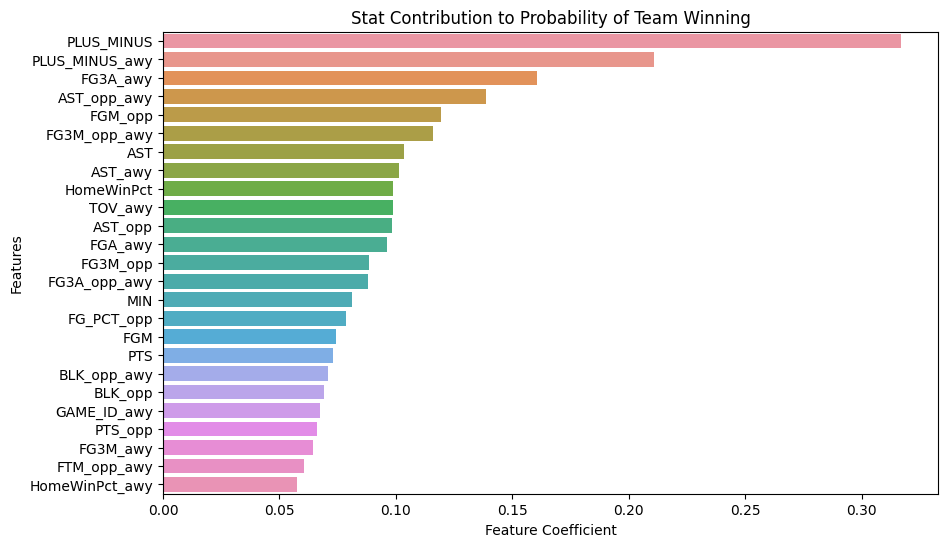

In [16]:
logit = LogisticRegression(C = 1e-2)
logit.fit(X_train, Y_train)
importance_scores = logit.coef_[0]

feature_names = X.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(importance_scores)}).sort_values(by="Importance").tail(25)

dropped_columns = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(importance_scores)}).sort_values(by="Importance").head(25)['Feature']

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.xlabel('Feature Coefficient')
plt.ylabel('Features')
plt.title('Stat Contribution to Probability of Team Winning')
plt.show()

In [216]:
list(dropped_columns)

['DREB_awy',
 'REB_awy',
 'DREB',
 'GAME_ID_awy',
 'DREB_opp_awy',
 'DREB_opp',
 'FT_PCT_opp',
 'FG3_PCT_opp_awy',
 'OREB',
 'REB_opp_awy',
 'REB',
 'WStreak',
 'OREB_awy',
 'WStreak_awy',
 'FG3_PCT_opp',
 'FT_PCT',
 'FT_PCT_awy',
 'FTM',
 'FTA_opp_awy',
 'BLK_awy',
 'FT_PCT_opp_awy',
 'STL_opp_awy',
 'PF_opp',
 'REB_opp',
 'OREB_opp_awy']

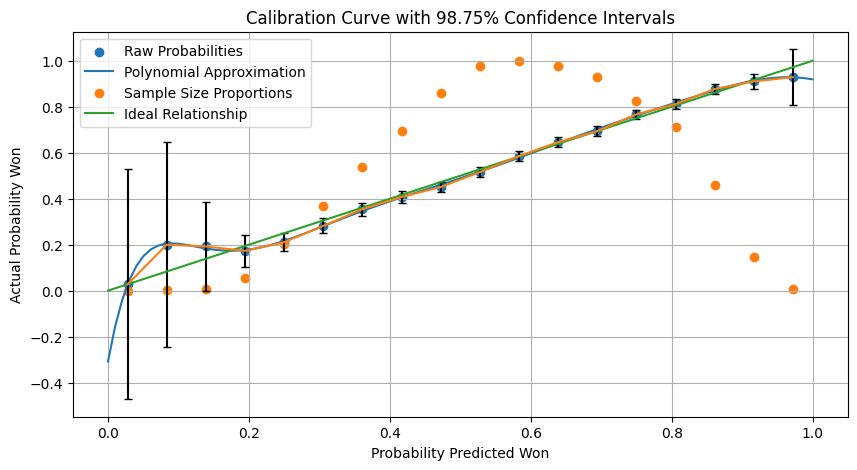

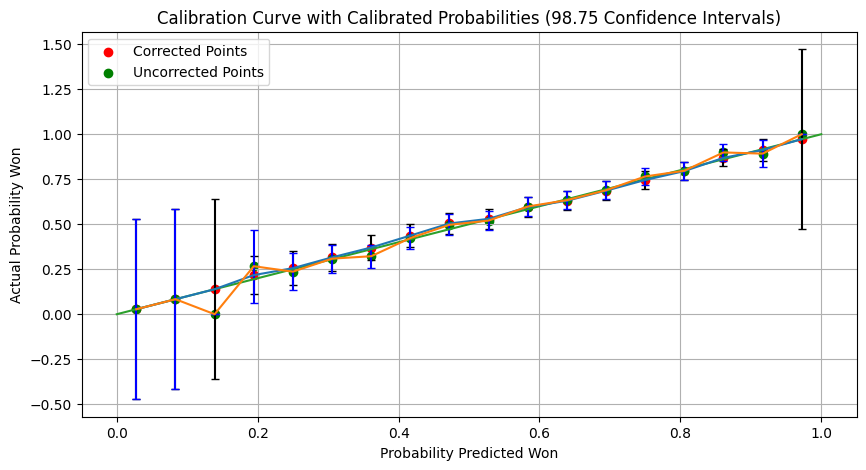

[<function moneylinefunctions.calibration_plot.<locals>.conversion_func(x, linear_model, poly)>,
 LinearRegression(),
 PolynomialFeatures(degree=9)]

In [17]:
calibration_plot(model, X_train, Y_train, X_test, Y_test)

#### Finding Player Stats

In [59]:
home_df.loc[home_df["TEAM_ABBREVIATION"] == "LAL", :]

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,GAME_ID,GAME_DATE,WL,MIN,PTS,FGM,FGA,...,FTA_awy,FT_PCT_awy,OREB_awy,DREB_awy,REB_awy,AST_awy,STL_awy,BLK_awy,TOV_awy,PF_awy
13281,22023,1610612747,LAL,22300740,2024-02-08,L,239,106,41,89,...,7,0.857,14,36,50.0,33,4,6,12,17
13282,22023,1610612747,LAL,22300633,2024-01-25,W,240,141,53,87,...,29,0.897,12,27,39.0,27,7,6,16,18
13283,22023,1610612747,LAL,22300605,2024-01-21,W,240,134,47,86,...,20,0.850,10,25,35.0,24,7,5,12,21
13284,22023,1610612747,LAL,22300591,2024-01-19,L,239,112,40,90,...,14,0.786,8,33,41.0,31,10,4,8,17
13285,22023,1610612747,LAL,22300577,2024-01-17,W,242,127,49,91,...,18,0.833,11,32,43.0,26,4,5,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14762,21994,1610612747,LAL,29400181,1994-12-02,W,240,107,43,93,...,35,0.629,9,35,44.0,21,7,3,18,18
14763,21994,1610612747,LAL,29400129,1994-11-23,W,240,118,49,88,...,27,0.630,25,29,54.0,26,4,2,17,22
14764,21994,1610612747,LAL,29400099,1994-11-18,W,240,82,35,87,...,18,0.667,12,37,49.0,21,3,5,22,25
14765,21994,1610612747,LAL,29400084,1994-11-16,L,240,89,35,95,...,21,0.714,14,37,51.0,35,9,7,23,24


In [4]:
from nba_api.stats.static import players
from nba_api.stats.endpoints import BoxScorePlayerTrackV3, PlayerGameLog
from moneylinefunctions import * 

lebron = players.find_players_by_first_name("LeBron")[0]
print(lebron)
player_stats = PlayerGameLog(season="2010", player_id=lebron['id'], season_type_all_star="Regular Season")
player_df = player_stats.get_data_frames()[0]
player_df.tail()

{'id': 2544, 'full_name': 'LeBron James', 'first_name': 'LeBron', 'last_name': 'James', 'is_active': True}


,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
74,22010,2544,0021000050,"NOV 02, 2010",MIA vs. MIN,W,32,7,12,0.583,...,0,0,12,2,1,1,0,20,32,0
75,22010,2544,0021000040,"OCT 31, 2010",MIA @ NJN,W,29,5,12,0.417,...,7,7,7,2,0,5,3,20,18,0
76,22010,2544,0021000025,"OCT 29, 2010",MIA vs. ORL,W,30,6,13,0.462,...,6,6,7,0,0,3,4,15,13,0
77,22010,2544,0021000006,"OCT 27, 2010",MIA @ PHI,W,38,5,12,0.417,...,6,6,7,2,1,9,1,16,6,0
78,22010,2544,0021000001,"OCT 26, 2010",MIA @ BOS,L,43,10,21,0.476,...,4,4,3,1,2,8,1,31,1,0


In [32]:
player_df.columns

Index(['SEASON_ID', 'Player_ID', 'Game_ID', 'GAME_DATE', 'MATCHUP', 'WL',
       'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA',
       'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF',
       'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE'],
      dtype='object')

In [5]:
from nba_api.stats.endpoints import PlayerCareerStats 
import time
from tqdm import tqdm


player_list = players.get_players()
players_to_include = []

for player in tqdm(player_list):
    try:
        time.sleep(0.1)
        player_info = PlayerCareerStats(player_id = player['id'], per_mode36="Per36", league_id_nullable="00", timeout=2)
        career_stats = player_info.get_data_frames()[1]
        try:
            if career_stats.loc[0, "PTS"] > 5 and career_stats.loc[0, "MIN"] > 10000:
                players_to_include.append(player)
        except:
            pass
    except:
        print("Timed Out")


    

player_info[1]

  0%|          | 1/4900 [00:02<2:54:58,  2.14s/it]

Timed Out


  0%|          | 4/4900 [00:04<1:41:40,  1.25s/it]

Timed Out


  0%|          | 8/4900 [00:07<1:24:59,  1.04s/it]

Timed Out


  0%|          | 10/4900 [00:10<1:38:17,  1.21s/it]

Timed Out


  0%|          | 12/4900 [00:12<1:44:12,  1.28s/it]

Timed Out


  0%|          | 13/4900 [00:14<2:05:45,  1.54s/it]

Timed Out


  0%|          | 15/4900 [00:17<1:46:01,  1.30s/it]

Timed Out


  0%|          | 17/4900 [00:19<1:47:59,  1.33s/it]

Timed Out


  0%|          | 19/4900 [00:21<1:49:22,  1.34s/it]

Timed Out


  0%|          | 21/4900 [00:24<1:54:10,  1.40s/it]

Timed Out


  0%|          | 22/4900 [00:26<2:13:45,  1.65s/it]

Timed Out


  0%|          | 24/4900 [00:28<2:01:48,  1.50s/it]

Timed Out


In [28]:
master_df = pd.DataFrame()
for player in tqdm(players_to_include):
    for season in range(1995, 2025):
        player_stats = PlayerGameLog(season=str(season), player_id=player['id'], season_type_all_star="Regular Season")
        player_df = player_stats.get_data_frames()[0]
        if len(player_df) > 40: 
            master_df = pd.concat((master_df, player_df))

  2%|▏         | 7/281 [01:29<58:12, 12.75s/it]  


KeyboardInterrupt: 

In [32]:
len(players_to_include)

32